## 텐서플로우
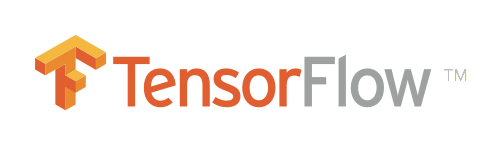  
머신러닝을 위한 구글의 오픈소스 플랫폼으로 신경망의 빌드 및 모델을 훈련 배포할 수 있도록 도움을 주는 라이브러리  
유사한 패키지로는 Pytorch 존재!

In [7]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib
%pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 52.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 51.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.2 MB/s eta 0:00:00:00:01
   ━━━━━━━

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
# PIL ( Pillow 로드 )
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# 텐서플로우의 keras 패키지에서 layers 와 시퀀스 모델을 불러오기

In [2]:
# 테스트 데이터셋 다운로드 - by Google
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# 텐서플로우 데이터 라이브러리에서 데이터셋 다운로드
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
# 케라스 유틸리티의 get_file 메서드를 활용하여 압축 해제
data_dir = pathlib.Path(data_dir).with_suffix('')
# data_dir변수의 데이터를 path 타입으로 변환하고, with_suffix 를 활용하여 확장자를 제거한다.add()

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
# glob 패키지로 jpg 파일 타입의 개수를 리스트로 반환하고 개수를 세어 image_count에 저장
print(image_count)
# 데이터 사본의 총 개수

3670


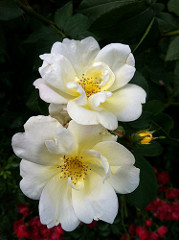

In [4]:
roses = list(data_dir.glob('roses/*'))
# glob를 통해 디렉토리의 명이 roses인 것을 불러와 list객체로 반환한다.
PIL.Image.open(str(roses[0]))
# PIL(Pillow)의 Image.open메서드를 활용하여 리스트 객체로 반환된 roses[0]번 인덱스에 해당하는 장미의
# 파일 이름을 문자형으로 바꾸어 이미지 형태로 출력한다.
# 장미 타입

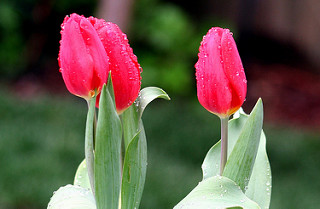

In [5]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))
# 위와 동일한 동작 수행
# 튤립 타입

In [6]:
# 데이터셋 생성 ( 매개변수 지정 )
batch_size = 32
# 배치 사이즈 : 머신러닝에서 모델을 학습시킬 때 사용하는 데이터의 단위
# 즉, 한번에 입력되는 데이터의 개수

# 이미지의 가로 세로 크기 지정
# 현재 이미지의 크기가 정해지지 않아 (전처리 안됨) 이에 따라 이미지의 사이즈를 조정
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  # 학습 데이터셋 구축, 케라스의 데이터셋 로드 명령어 사용
  data_dir,
  # 데이터셋의 경로 지정
  validation_split=0.2,
  # 전체 데이터의 20%를 검증 데이터로 설정하는 코드 ( 0.2 == 20% )
  subset="training",
  # 현재 생성하는 데이터셋에 학습용 데이터셋으로 라벨을 주는 것(이름부여)
  seed=123,
  # 데이터 분리를 위한 랜덤 시드 지정 (random 패키지의 seed와 유사)
  
  # 이미지 사이즈와 배치 사이즈 지정
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# 위와 동일, 20%를 검증 데이터로 설정하고 시드는 123, 타입은 검증데이터로 라벨 부여

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
# 클래스(학습할 데이터의 종류)를 지정하고 class_names에 저장
# 학습할 데이터의 종류를 예로 들자면 디렉토리의 이름
# 꽃 타입에서는 데이지, 로즈, 튤립 종류 등 종류로 구분한 데이터들의 명칭
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


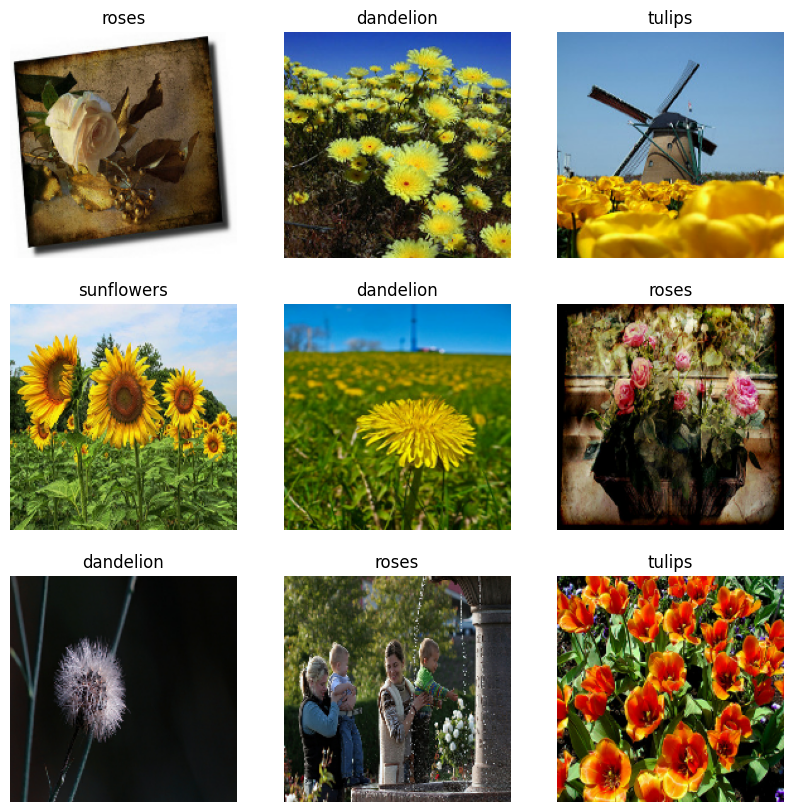

In [10]:
import matplotlib.pyplot as plt
# matplotlib의 plt (액자 지정)을 하기 위한 패키지 불러오기
# 시각화 옵션에서 사용하는 액자와 유사

plt.figure(figsize=(10, 10))
# fig(액자) 사이즈를 10x10으로 지정
for images, labels in train_ds.take(1):
  # 학습용 데이터셋에서 첫 번째 배치(take(1))를 가져와 images, labels로 각각 분류
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # 3x3그리드의 서브플롯 생성
    plt.imshow(images[i].numpy().astype("uint8"))
    # images[i]에 저장된 이미지를 numpy 배열로 변환하고, uint8을 사용하여 0~255 사이의 정수로 변환한다.
    plt.title(class_names[labels[i]])
    # labels[i]의 인덱스(추적값)을 가진 데이터를 class_names로 반환 ( 클래스 명 반환 )
    # 이미지의 이름 출력 ( 아래의 장미, 튤립 등 사진에 나온 꽃의 종류 표현 )
    plt.axis("off")
    # 축 정보 숨기기 ( 이미지만 표현 )
    # 훈련 데이터세트 출력

In [11]:
for image_batch, labels_batch in train_ds:
  # 학습용 데이터셋에서, image_batch와 labels_batch분류
  # 각 배치별로 데이터를 가져옴 ( take(int) ) 메서드 미사용 시
  print(image_batch.shape)
  # 현재 배치의 이미지 형태 출력 (이미지의 수, 높이, 너비, 채널 수 )
  # 채널 수는 컬러의 경우 3(r,g,b)
  print(labels_batch.shape)
  # 현재 배치의 레이블 형태 출력 ( 배치에 존재하는 레이블에 해당하는 데이터의 수 )
  break
# image_batch는 (32, 180, 180, 3) 형상의 텐서

(32, 180, 180, 3)
(32,)


180x180x3 형상의 32개 이미지 묶음  
마지막 차원은 색상 채널 RGB를 나타냄
label_batch는 형상 (32,)의 텐서이며 32개 이미지에 해당하는 레이블
image_batch 및 labels_batch 텐서에서 .numpy()를 호출하여 이를 numpy.ndarray로 변환 가능

In [16]:
# 옵션
# Dataset.cache()는 첫 epoch 동안 디스크에서 이미지를 로드한 후 이미지를 메모리에 유지합니다. 이렇게 하면 모델을 훈련하는 동안 데이터세트가 병목 상태가 되지 않음. 
# 데이터세트가 너무 커서 메모리에 맞지 않는 경우, 이 메서드를 사용하여 성능이 높은 온디스크 캐시를 생성
# Dataset.prefetch는 훈련하는 동안 데이터 전처리 및 모델 실행을 중첩

In [12]:
# 데이터세트 구성
AUTOTUNE = tf.data.AUTOTUNE
# 데이터 최적화 tf.data API를 활용하여 데이터 로딩 속도를 최적화해주는 메서드 (없어도 되긴 함)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# 학습 데이터셋에 대한 변환 수행, Shuffle(1000)은 데이터를 임의로 믹싱 ( 1000은 버퍼의 크기를 나타냄 )
# prefetch(학습 전에 다음 배치를 미리 로드하는 명령어, 여기서는 배치 사이즈로 최적화된 사이즈를 반환하는 autotune API 활용)
# 다음 배치를 미리 로드하는 이유 : 학습의 속도 향성 및 처리 최적화(미리 메모리에 적재 등)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# 검증 데이터셋에 대한 다음 배치 미리 가져오기
# 임의로 믹싱할 필요가 없어 (데이터셋에서 일부를 랜덤으로 추출한 상태-상단 코드)로 인해 SHUFFLE이 필요 없음

In [13]:
# tf.keras.layers.Rescaling을 사용하여 값을 [0, 1] 범위로 표준화
normalization_layer = layers.Rescaling(1./255)
# 이미지를 정규화하는 이유
# 이미지 데이터는 보총 0~255의 정수로 표현되는데 이것을 그대로 학습하면 학습 속도가 느려지거나, 학습이 제대로 이루어지지 않을 수도 있음
# 따라서 이미지를 0~1 사이의 값으로 조정하여 학습을 용이하게 만들 수 있고 이를 이미지 정규화라고 지칭

In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# 정규화된 데이터셋 생성, 학습 데이터셋에 map함수를 통해 반복처리하고, lambda 식과 위에서 정의한 변수에 담긴 함수를 통해 
# 데이터셋 전체를 0~1사이의 값으로 변환

image_batch, labels_batch = next(iter(normalized_ds))
# 정규화된 데이터셋(normalized_ds)에서 첫 번째 배치를 가져오는 역할을 수행한다.
# iter 메서드 : 이터레이터 생성
# next 메서드 : 이터레이터의 다음 요소를 가져오는 역할 수행
# 이터레이터 : 값을 차례대로 꺼낼 수 있는 객체 (list, dict(딕셔너리), tuple, byte) 등이 해당한다.
# stack(스택) 알고리즘 혹은 배열 알고리즘이 해당

first_image = image_batch[0]
# 이미지 배치의 첫 번째 이미지 가져오기

print(np.min(first_image), np.max(first_image))
# 이미지의 최소값과 최대값을 출력하여 이미지가 0~1사이의 값으로 정규화되었는지 확인하는 역할 수행
# Dataset.map을 호출하여 데이터세트에 이를 적용

0.0 0.9363255


### 활성화 함수
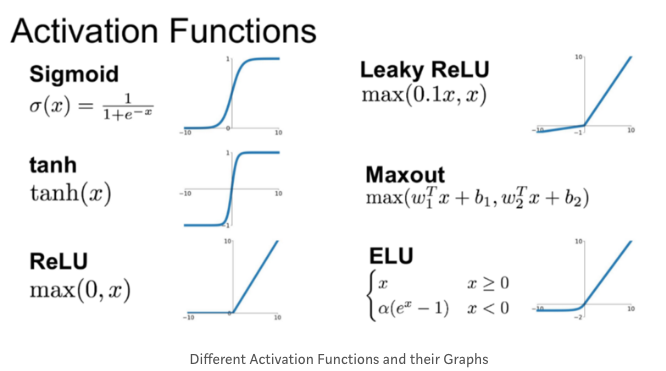  
활성화 함수는 정말 많은 함수가 있고 대표적으로 시그모이드와 렐루 함수가 존재한다  


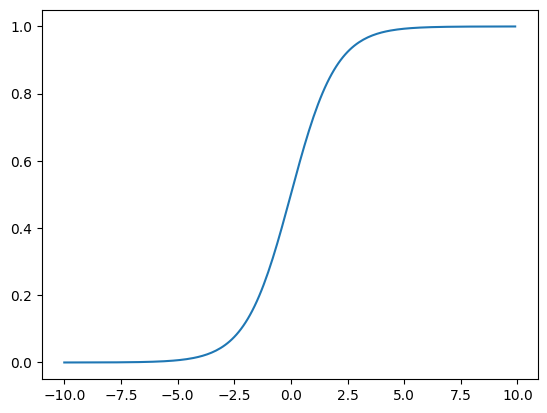

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def binary_step_activate_function(x):
    return 1/(1+np.exp(-x))
    
x = np.arange(-10, 10, 0.1)
y = binary_step_activate_function(x)

plt.plot(x,y)
plt.show()

활성화 함수는 인공지능의 신경망 출력을 결정하는 역할을 수행하고, 예를 들어  
위의 시그모이드 함수의 경우 0을 기점으로 1(10)에 다가갈수록 데이터의 출력이 1이 되는 반면,  
-1(-10)에 다가갈수록 데이터의 출력이 0이 되는 특징을 가지고 있다.  

ex ) 입력이 -0.5 > 0.0122  등 반환

### 신경망의 구조 시각화 ( By Dall-e3 )
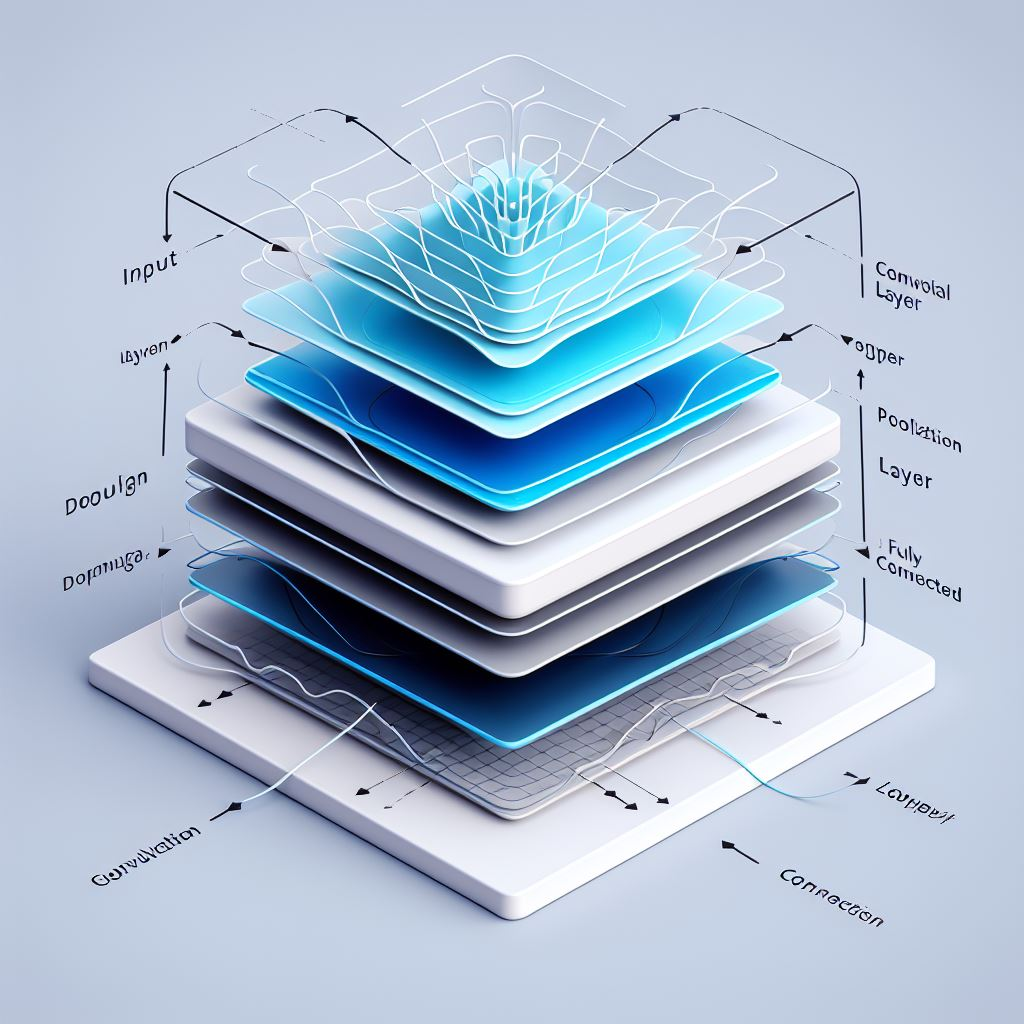

### MaxPooling2D
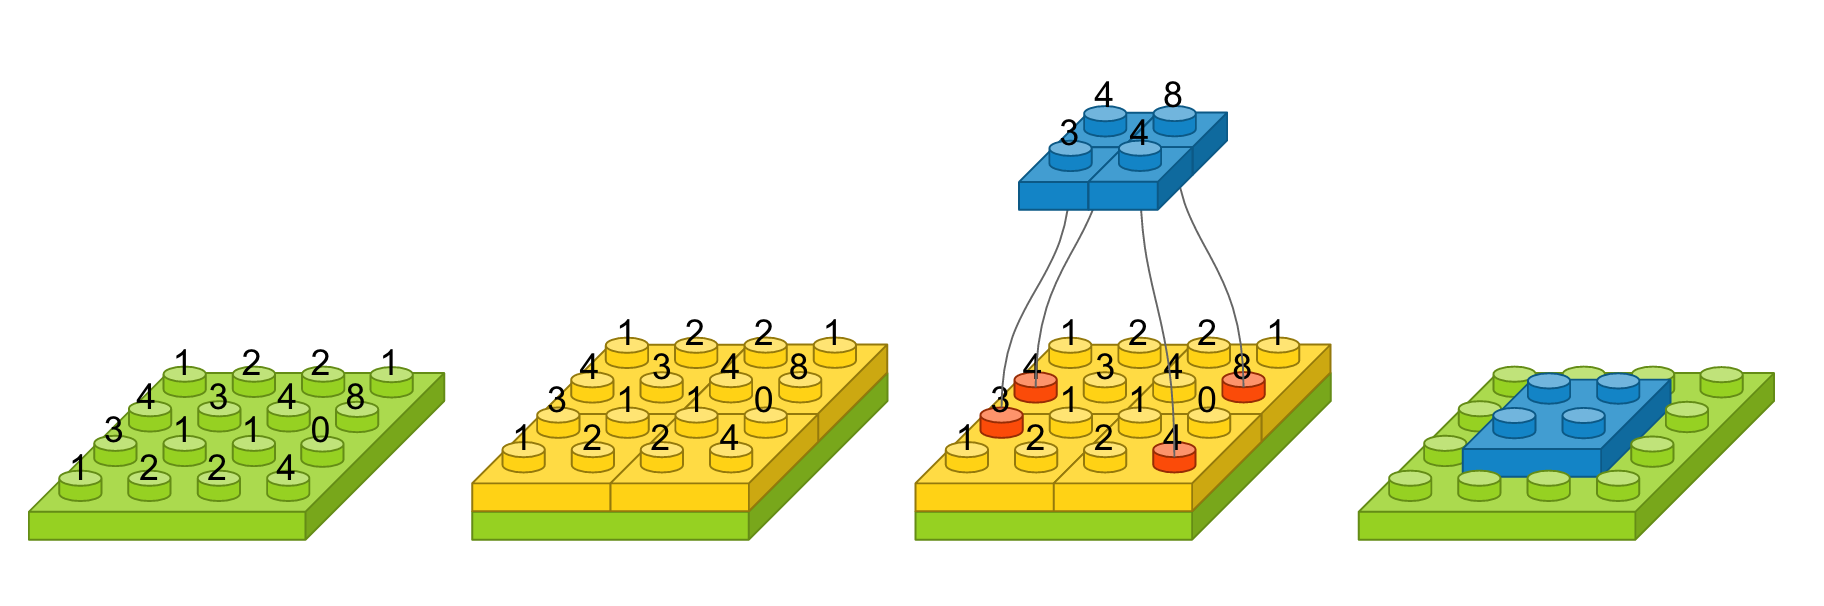

### Flatten
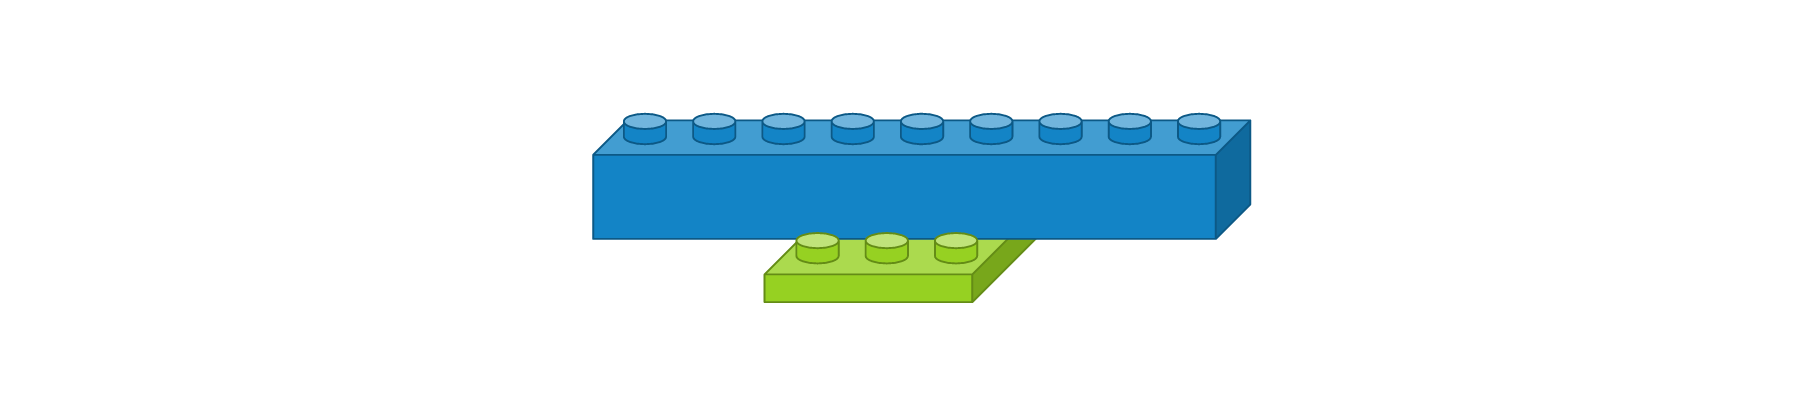

In [5]:
class_names = [4, 2, 2]

In [6]:
# 모델 생성
num_classes = len(class_names)
# class_names(클래스의 이름 보유)로부터 개수를 세서 클래스의 총 타입을 계산하여 반환한다.
# ex) turple 등을 전부 포함한 클래스의 총 개수 (ex)장미, 데이지 > 2(0,1)

model = Sequential([
  # Sequential(tf.keras)를 활용하여 모델을 생성한다.
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # 이미지의 입력 픽셀을 0~1사이로 변경한다.(전처리), 높이, 너비, 색 차원(r,g,b)
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  # 2D 컨볼루션 레이어를 추가하고, 16개의 필터, 3은 필터의 크기(3x3)을 지정한다.
  # padding='same'은 padding을 적용하여 이미지의 손실을 예방/감수 하고 출력 이미지의 크기와 입력 이미지의 크기를 동일하게 처리
  # 활성화 함수로 relu 함수 사용 / 이미지의 출력을 결정하기 위해 활성화 함수 사용
  layers.MaxPooling2D(),
  # 맥스풀링 레이어 추가 (2d) : 이미지에 존재하는 특징 맵의 사이즈를 줄이고, 특징을 강조
  # 이미지의 크기를 줄이고(사이즈 줄이기) 이에 따라 자동으로 특징이 강조됨
  # 즉, 중요한 값만 추출하는 역할과 비슷함
  # ex) 1, 2, 4, 5의 데이터가 이미지에 2x2로 존재할 때, 여기서 가장 관련성이 높은 5만 추출하고 나머지 영역에서
  # 동일하게 추출하여, 4x4 > 2x2로 축소하고 자연적으로 특징 강조
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  # 위와 동일한 역할 그러나, 32개의 필터, 3x3필터의 크기 지정
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  # 64개의 필터, 3x3필터 크기 지정
  layers.MaxPooling2D(),
  layers.Flatten(),
  # 플래튼 레이어 추가 : 다차원 텐서(데이터)를 1차원으로 변경하는 역할 수행
  layers.Dense(128, activation='relu'),
  # 출력 레이어 수행
  layers.Dense(num_classes)
])
# relu 활성화 함수를 통해서 레이어 생성

NameError: name 'Sequential' is not defined

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 아담 옵티마이저와 tf.keras.losses.SparseCategoricalCrossentropy 손실 함수를 선택

In [18]:
model.summary()
# 네트워크의 모든 레이어 호출( df['total_bill'].info() 같은 메서드 )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [19]:
# 10에포크 동안 모델 학습
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 81s 865ms/step - loss: 1.3800 - accuracy: 0.3958 - val_loss: 1.0613 - val_accuracy: 0.5613
Epoch 2/10
92/92 [==============================] - 90s 977ms/step - loss: 1.0324 - accuracy: 0.6025 - val_loss: 0.9989 - val_accuracy: 0.5804
Epoch 3/10
92/92 [==============================] - 85s 928ms/step - loss: 0.8946 - accuracy: 0.6587 - val_loss: 0.8969 - val_accuracy: 0.6308
Epoch 4/10
92/92 [==============================] - 78s 850ms/step - loss: 0.7068 - accuracy: 0.7323 - val_loss: 0.8751 - val_accuracy: 0.6676
Epoch 5/10
92/92 [==============================] - 70s 765ms/step - loss: 0.5151 - accuracy: 0.8079 - val_loss: 0.9581 - val_accuracy: 0.6403
Epoch 6/10
92/92 [==============================] - 71s 767ms/step - loss: 0.3258 - accuracy: 0.8859 - val_loss: 1.1584 - val_accuracy: 0.6144
Epoch 7/10
92/92 [==============================] - 67s 723ms/step - loss: 0.2028 - accuracy: 0.9343 - val_loss: 1.1396 - val_accuracy: 0.6499

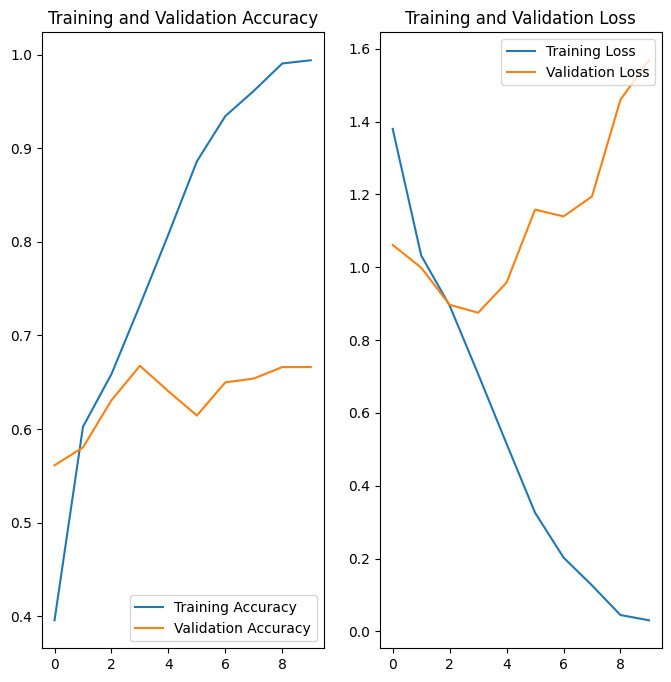

In [20]:
# 훈련 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# 모델 테스트
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 751ms/step
This image most likely belongs to sunflowers with a 99.78 percent confidence.
